### Chapter 3: Creating a Binary Mask for an MRI

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage import filters

#### Create a binary mask for an MRI

In [2]:
# page 64
# load the dicom file
ds = dicom.dcmread("knee.dcm")

# view the contents of the entire dataset
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 224
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.8066.5.7364.2018031712013590954
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_361'
(0002, 0016) Source Application Entity Title     AE: 'SOCHI01PACS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20180317'
(0008, 0013) Instance Creation Time              TM: '120201'
(0008, 

In [3]:
# isolate the MRI
img = ds.pixel_array

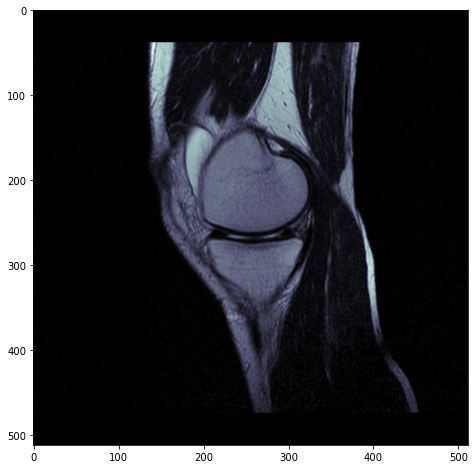

In [4]:
# plot the MRI
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap=plt.cm.bone);

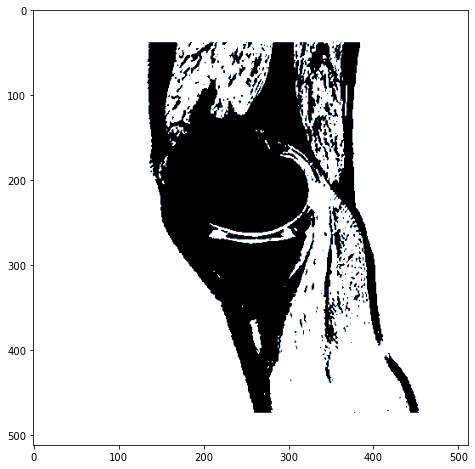

In [5]:
# create a binary mask to produce a black and white image
# create an array of all zeros
arr = np.zeros(img.shape)

# create a boolean array where the pixel values are less then the mean
mask = img <= img.mean()

# apply the mask making the pixels less than the mean all "white"
arr[mask] = 1

# create a boolean array where the pixel values are more than the mean
mask = img > img.mean()

# apply the mask making the pixels greater than the mean all "black"
arr[mask] = 0

# plot the masked image
plt.figure(figsize=(8, 8))
plt.imshow(arr, cmap=plt.cm.bone);

#### Use Sobel and Roberts filters for edge detection

In [6]:
# page 66
# instantiate the edge filters
edge_sobel = filters.sobel(arr)
edge_roberts = filters.roberts(arr)

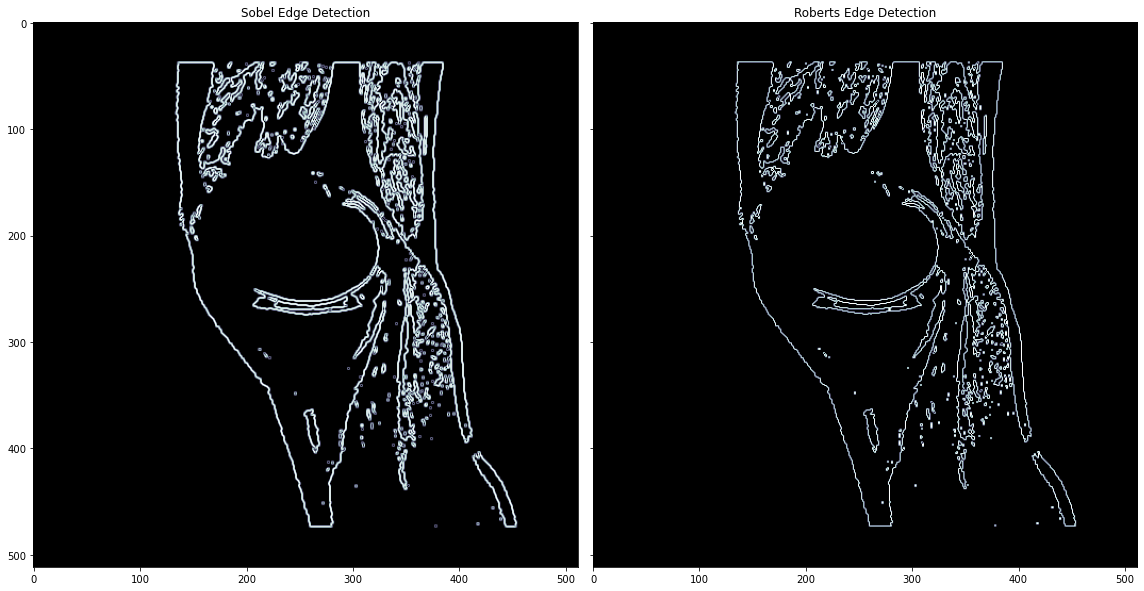

In [7]:
# plot the results
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 32))
ax[0].imshow(edge_sobel, cmap=plt.cm.bone)
ax[0].set_title("Sobel Edge Detection")
ax[1].imshow(edge_roberts, cmap=plt.cm.bone)
ax[1].set_title("Roberts Edge Detection")
plt.tight_layout();